# LDA for forecasting

First, we load a csv file `articles_daily_ts.csv` with the data, where each news article is assigned a day on which market participants can react to it. The file is imported to the data frame `data`.

In [1]:
import os
import pandas as pd
path_to_file = os.getcwd().replace('\\analysis\\analysis_topics', '') + '\\finance data'
data = pd.read_csv(path_to_file + '\\articles_daily_ts.csv', encoding = 'utf-8-sig', sep=';') 
data = data.rename(columns = {"dates": "dates_day"})
data.head()

,texts,titles,dates_day,year,month,day
0,Chilean salmon prices see a lift in week 1. Pr...,Chilean salmon prices see a lift in week 1.,2016-01-13,2016,1,13
1,Nasdaq salmon price index up 48% over past thr...,Nasdaq salmon price index up 48% over past thr...,2016-01-13,2016,1,13
2,Great time to be in the seafood industry. Nati...,Great time to be in the seafood industry.,2016-01-18,2016,1,18
3,Fresh = healthy. Fresh translates to healthy i...,Fresh = healthy.,2016-01-18,2016,1,18
4,Shrimp to get social media revamp. The NFI Shr...,Shrimp to get social media revamp.,2016-01-18,2016,1,18


We've set up our training data to only include articles that were published from January 13, 2016, to November 11, 2021. This is because we plan to use this model later to predict stock market trends in the future, specifically from November 12, 2021, to July 11, 2022.

In [2]:
# Ensure that the 'dates_day' column is in datetime format
data['dates_day'] = pd.to_datetime(data['dates_day'])

# Select all the articles published up to and including 11/11/2021
data_train = data[data['dates_day'] <= '2021-11-11']

In [3]:
# Select all the articles published after 11/11/2021
data_test = data[data['dates_day'] > '2021-11-11']

Next, we will perform data preprocessing on the training portion of our dataset, `data_train`. 

In [4]:
import topicmodels
docsobj = topicmodels.RawDocs(data_train.texts, "long")
docsobj.token_clean(1)
docsobj.stopword_remove("tokens")
docsobj.words_remove(docsobj.journalist_names)
docsobj.stem()
docsobj.stopword_remove('stems')
docsobj.term_rank("stems")

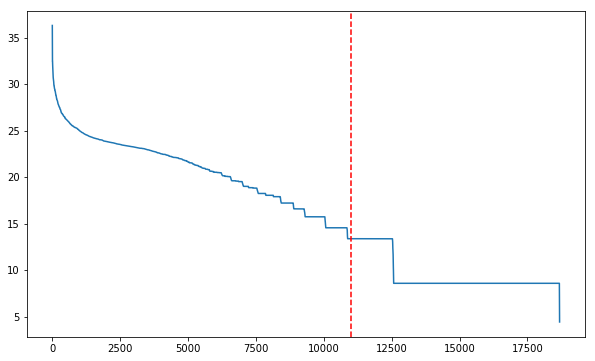

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot([x[1] for x in docsobj.tfidf_ranking])
plt.axvline(x=11000, color='r', linestyle='--')  # Add vertical line at index 11000
plt.show()

In [6]:
docsobj.rank_remove("tfidf","stems",docsobj.tfidf_ranking[11000][1])
all_stems = [s for d in docsobj.stems for s in d]
print("number of unique stems = %d" % len(set(all_stems)))
print("number of total stems = %d" % len(all_stems))

number of unique stems = 10873
number of total stems = 695143


Pre-process the test portion of our data.

In [7]:
docsobj_test = topicmodels.RawDocs(data_test.texts, "long")
docsobj_test.token_clean(1)
docsobj_test.stopword_remove("tokens")
docsobj_test.words_remove(docsobj.journalist_names)
docsobj_test.stem()
docsobj_test.stopword_remove('stems')
docsobj_test.term_rank("stems")

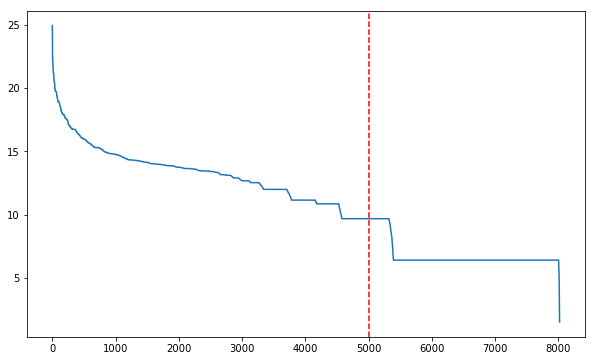

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot([x[1] for x in docsobj_test.tfidf_ranking])
plt.axvline(x=5000, color='r', linestyle='--')  # Add vertical line at index 5000
plt.show()

In [9]:
docsobj_test.rank_remove("tfidf","stems",docsobj_test.tfidf_ranking[5000][1])

## Estimating LDA

Initialize an LDA object using the LDA class. We pass a list of stems docsobj.stems as an input. The number of topics is 100.

In [10]:
ldaobj = topicmodels.LDA.LDAGibbs(docsobj.stems,100)

There are three attributes of ldaobj:
    
1. The number of topics, K.
2. Thy hyperparameter $\alpha$ for the Dirichlet prior of $\theta_d$, document-specific topic proportions.
3. Thy hyperparameter $\eta$ (beta) for the Dirichlet prior of $\beta_k$, topic-specific vocabulary distributions.

Griffits and Steyvers (2004):

$\alpha = 50/K$

$\eta = 200/V$


In [11]:
print ldaobj.K # number of topic, user defined.
print ldaobj.alpha # hyperparameter for document-topic distribution, automatically defined
print ldaobj.beta # hyperparameter for topics, automatically defined

100
0.5
0.0183941874368


Topic assignment variables $z$ are initialized randomly to the values in $\{1,...,K\}$ by drawing $z_{n,d}$ from a uniform distribution.

In [12]:
print ldaobj.topic_seed[:10]
print ldaobj.topic_seed.shape

[33 35 40 63 97 18  4 54 57 83]
(695143L,)


Now we are ready to sample.

500 is the number of burn-in iterations;
50 is a thinning interval;
150 is the number of samples to take.

In [13]:
from datetime import datetime #track time
startTime = datetime.now()
ldaobj.sample(500,50,150)
print datetime.now() - startTime

Iteration 1 of (collapsed) Gibbs sampling
Iteration 2 of (collapsed) Gibbs sampling
Iteration 3 of (collapsed) Gibbs sampling
Iteration 4 of (collapsed) Gibbs sampling
Iteration 5 of (collapsed) Gibbs sampling
Iteration 6 of (collapsed) Gibbs sampling
Iteration 7 of (collapsed) Gibbs sampling
Iteration 8 of (collapsed) Gibbs sampling
Iteration 9 of (collapsed) Gibbs sampling
Iteration 10 of (collapsed) Gibbs sampling
Iteration 11 of (collapsed) Gibbs sampling
Iteration 12 of (collapsed) Gibbs sampling
Iteration 13 of (collapsed) Gibbs sampling
Iteration 14 of (collapsed) Gibbs sampling
Iteration 15 of (collapsed) Gibbs sampling
Iteration 16 of (collapsed) Gibbs sampling
Iteration 17 of (collapsed) Gibbs sampling
Iteration 18 of (collapsed) Gibbs sampling
Iteration 19 of (collapsed) Gibbs sampling
Iteration 20 of (collapsed) Gibbs sampling
Iteration 21 of (collapsed) Gibbs sampling
Iteration 22 of (collapsed) Gibbs sampling
Iteration 23 of (collapsed) Gibbs sampling
Iteration 24 of (col

Iteration 221 of (collapsed) Gibbs sampling
Iteration 222 of (collapsed) Gibbs sampling
Iteration 223 of (collapsed) Gibbs sampling
Iteration 224 of (collapsed) Gibbs sampling
Iteration 225 of (collapsed) Gibbs sampling
Iteration 226 of (collapsed) Gibbs sampling
Iteration 227 of (collapsed) Gibbs sampling
Iteration 228 of (collapsed) Gibbs sampling
Iteration 229 of (collapsed) Gibbs sampling
Iteration 230 of (collapsed) Gibbs sampling
Iteration 231 of (collapsed) Gibbs sampling
Iteration 232 of (collapsed) Gibbs sampling
Iteration 233 of (collapsed) Gibbs sampling
Iteration 234 of (collapsed) Gibbs sampling
Iteration 235 of (collapsed) Gibbs sampling
Iteration 236 of (collapsed) Gibbs sampling
Iteration 237 of (collapsed) Gibbs sampling
Iteration 238 of (collapsed) Gibbs sampling
Iteration 239 of (collapsed) Gibbs sampling
Iteration 240 of (collapsed) Gibbs sampling
Iteration 241 of (collapsed) Gibbs sampling
Iteration 242 of (collapsed) Gibbs sampling
Iteration 243 of (collapsed) Gib

Iteration 415 of (collapsed) Gibbs sampling
Iteration 416 of (collapsed) Gibbs sampling
Iteration 417 of (collapsed) Gibbs sampling
Iteration 418 of (collapsed) Gibbs sampling
Iteration 419 of (collapsed) Gibbs sampling
Iteration 420 of (collapsed) Gibbs sampling
Iteration 421 of (collapsed) Gibbs sampling
Iteration 422 of (collapsed) Gibbs sampling
Iteration 423 of (collapsed) Gibbs sampling
Iteration 424 of (collapsed) Gibbs sampling
Iteration 425 of (collapsed) Gibbs sampling
Iteration 426 of (collapsed) Gibbs sampling
Iteration 427 of (collapsed) Gibbs sampling
Iteration 428 of (collapsed) Gibbs sampling
Iteration 429 of (collapsed) Gibbs sampling
Iteration 430 of (collapsed) Gibbs sampling
Iteration 431 of (collapsed) Gibbs sampling
Iteration 432 of (collapsed) Gibbs sampling
Iteration 433 of (collapsed) Gibbs sampling
Iteration 434 of (collapsed) Gibbs sampling
Iteration 435 of (collapsed) Gibbs sampling
Iteration 436 of (collapsed) Gibbs sampling
Iteration 437 of (collapsed) Gib

Iteration 616 of (collapsed) Gibbs sampling
Iteration 617 of (collapsed) Gibbs sampling
Iteration 618 of (collapsed) Gibbs sampling
Iteration 619 of (collapsed) Gibbs sampling
Iteration 620 of (collapsed) Gibbs sampling
Iteration 621 of (collapsed) Gibbs sampling
Iteration 622 of (collapsed) Gibbs sampling
Iteration 623 of (collapsed) Gibbs sampling
Iteration 624 of (collapsed) Gibbs sampling
Iteration 625 of (collapsed) Gibbs sampling
Iteration 626 of (collapsed) Gibbs sampling
Iteration 627 of (collapsed) Gibbs sampling
Iteration 628 of (collapsed) Gibbs sampling
Iteration 629 of (collapsed) Gibbs sampling
Iteration 630 of (collapsed) Gibbs sampling
Iteration 631 of (collapsed) Gibbs sampling
Iteration 632 of (collapsed) Gibbs sampling
Iteration 633 of (collapsed) Gibbs sampling
Iteration 634 of (collapsed) Gibbs sampling
Iteration 635 of (collapsed) Gibbs sampling
Iteration 636 of (collapsed) Gibbs sampling
Iteration 637 of (collapsed) Gibbs sampling
Iteration 638 of (collapsed) Gib

Iteration 809 of (collapsed) Gibbs sampling
Iteration 810 of (collapsed) Gibbs sampling
Iteration 811 of (collapsed) Gibbs sampling
Iteration 812 of (collapsed) Gibbs sampling
Iteration 813 of (collapsed) Gibbs sampling
Iteration 814 of (collapsed) Gibbs sampling
Iteration 815 of (collapsed) Gibbs sampling
Iteration 816 of (collapsed) Gibbs sampling
Iteration 817 of (collapsed) Gibbs sampling
Iteration 818 of (collapsed) Gibbs sampling
Iteration 819 of (collapsed) Gibbs sampling
Iteration 820 of (collapsed) Gibbs sampling
Iteration 821 of (collapsed) Gibbs sampling
Iteration 822 of (collapsed) Gibbs sampling
Iteration 823 of (collapsed) Gibbs sampling
Iteration 824 of (collapsed) Gibbs sampling
Iteration 825 of (collapsed) Gibbs sampling
Iteration 826 of (collapsed) Gibbs sampling
Iteration 827 of (collapsed) Gibbs sampling
Iteration 828 of (collapsed) Gibbs sampling
Iteration 829 of (collapsed) Gibbs sampling
Iteration 830 of (collapsed) Gibbs sampling
Iteration 831 of (collapsed) Gib

Iteration 1027 of (collapsed) Gibbs sampling
Iteration 1028 of (collapsed) Gibbs sampling
Iteration 1029 of (collapsed) Gibbs sampling
Iteration 1030 of (collapsed) Gibbs sampling
Iteration 1031 of (collapsed) Gibbs sampling
Iteration 1032 of (collapsed) Gibbs sampling
Iteration 1033 of (collapsed) Gibbs sampling
Iteration 1034 of (collapsed) Gibbs sampling
Iteration 1035 of (collapsed) Gibbs sampling
Iteration 1036 of (collapsed) Gibbs sampling
Iteration 1037 of (collapsed) Gibbs sampling
Iteration 1038 of (collapsed) Gibbs sampling
Iteration 1039 of (collapsed) Gibbs sampling
Iteration 1040 of (collapsed) Gibbs sampling
Iteration 1041 of (collapsed) Gibbs sampling
Iteration 1042 of (collapsed) Gibbs sampling
Iteration 1043 of (collapsed) Gibbs sampling
Iteration 1044 of (collapsed) Gibbs sampling
Iteration 1045 of (collapsed) Gibbs sampling
Iteration 1046 of (collapsed) Gibbs sampling
Iteration 1047 of (collapsed) Gibbs sampling
Iteration 1048 of (collapsed) Gibbs sampling
Iteration 

Iteration 1233 of (collapsed) Gibbs sampling
Iteration 1234 of (collapsed) Gibbs sampling
Iteration 1235 of (collapsed) Gibbs sampling
Iteration 1236 of (collapsed) Gibbs sampling
Iteration 1237 of (collapsed) Gibbs sampling
Iteration 1238 of (collapsed) Gibbs sampling
Iteration 1239 of (collapsed) Gibbs sampling
Iteration 1240 of (collapsed) Gibbs sampling
Iteration 1241 of (collapsed) Gibbs sampling
Iteration 1242 of (collapsed) Gibbs sampling
Iteration 1243 of (collapsed) Gibbs sampling
Iteration 1244 of (collapsed) Gibbs sampling
Iteration 1245 of (collapsed) Gibbs sampling
Iteration 1246 of (collapsed) Gibbs sampling
Iteration 1247 of (collapsed) Gibbs sampling
Iteration 1248 of (collapsed) Gibbs sampling
Iteration 1249 of (collapsed) Gibbs sampling
Iteration 1250 of (collapsed) Gibbs sampling
Iteration 1251 of (collapsed) Gibbs sampling
Iteration 1252 of (collapsed) Gibbs sampling
Iteration 1253 of (collapsed) Gibbs sampling
Iteration 1254 of (collapsed) Gibbs sampling
Iteration 

Iteration 1664 of (collapsed) Gibbs sampling
Iteration 1665 of (collapsed) Gibbs sampling
Iteration 1666 of (collapsed) Gibbs sampling
Iteration 1667 of (collapsed) Gibbs sampling
Iteration 1668 of (collapsed) Gibbs sampling
Iteration 1669 of (collapsed) Gibbs sampling
Iteration 1670 of (collapsed) Gibbs sampling
Iteration 1671 of (collapsed) Gibbs sampling
Iteration 1672 of (collapsed) Gibbs sampling
Iteration 1673 of (collapsed) Gibbs sampling
Iteration 1674 of (collapsed) Gibbs sampling
Iteration 1675 of (collapsed) Gibbs sampling
Iteration 1676 of (collapsed) Gibbs sampling
Iteration 1677 of (collapsed) Gibbs sampling
Iteration 1678 of (collapsed) Gibbs sampling
Iteration 1679 of (collapsed) Gibbs sampling
Iteration 1680 of (collapsed) Gibbs sampling
Iteration 1681 of (collapsed) Gibbs sampling
Iteration 1682 of (collapsed) Gibbs sampling
Iteration 1683 of (collapsed) Gibbs sampling
Iteration 1684 of (collapsed) Gibbs sampling
Iteration 1685 of (collapsed) Gibbs sampling
Iteration 

Iteration 1862 of (collapsed) Gibbs sampling
Iteration 1863 of (collapsed) Gibbs sampling
Iteration 1864 of (collapsed) Gibbs sampling
Iteration 1865 of (collapsed) Gibbs sampling
Iteration 1866 of (collapsed) Gibbs sampling
Iteration 1867 of (collapsed) Gibbs sampling
Iteration 1868 of (collapsed) Gibbs sampling
Iteration 1869 of (collapsed) Gibbs sampling
Iteration 1870 of (collapsed) Gibbs sampling
Iteration 1871 of (collapsed) Gibbs sampling
Iteration 1872 of (collapsed) Gibbs sampling
Iteration 1873 of (collapsed) Gibbs sampling
Iteration 1874 of (collapsed) Gibbs sampling
Iteration 1875 of (collapsed) Gibbs sampling
Iteration 1876 of (collapsed) Gibbs sampling
Iteration 1877 of (collapsed) Gibbs sampling
Iteration 1878 of (collapsed) Gibbs sampling
Iteration 1879 of (collapsed) Gibbs sampling
Iteration 1880 of (collapsed) Gibbs sampling
Iteration 1881 of (collapsed) Gibbs sampling
Iteration 1882 of (collapsed) Gibbs sampling
Iteration 1883 of (collapsed) Gibbs sampling
Iteration 

Iteration 2066 of (collapsed) Gibbs sampling
Iteration 2067 of (collapsed) Gibbs sampling
Iteration 2068 of (collapsed) Gibbs sampling
Iteration 2069 of (collapsed) Gibbs sampling
Iteration 2070 of (collapsed) Gibbs sampling
Iteration 2071 of (collapsed) Gibbs sampling
Iteration 2072 of (collapsed) Gibbs sampling
Iteration 2073 of (collapsed) Gibbs sampling
Iteration 2074 of (collapsed) Gibbs sampling
Iteration 2075 of (collapsed) Gibbs sampling
Iteration 2076 of (collapsed) Gibbs sampling
Iteration 2077 of (collapsed) Gibbs sampling
Iteration 2078 of (collapsed) Gibbs sampling
Iteration 2079 of (collapsed) Gibbs sampling
Iteration 2080 of (collapsed) Gibbs sampling
Iteration 2081 of (collapsed) Gibbs sampling
Iteration 2082 of (collapsed) Gibbs sampling
Iteration 2083 of (collapsed) Gibbs sampling
Iteration 2084 of (collapsed) Gibbs sampling
Iteration 2085 of (collapsed) Gibbs sampling
Iteration 2086 of (collapsed) Gibbs sampling
Iteration 2087 of (collapsed) Gibbs sampling
Iteration 

Iteration 2276 of (collapsed) Gibbs sampling
Iteration 2277 of (collapsed) Gibbs sampling
Iteration 2278 of (collapsed) Gibbs sampling
Iteration 2279 of (collapsed) Gibbs sampling
Iteration 2280 of (collapsed) Gibbs sampling
Iteration 2281 of (collapsed) Gibbs sampling
Iteration 2282 of (collapsed) Gibbs sampling
Iteration 2283 of (collapsed) Gibbs sampling
Iteration 2284 of (collapsed) Gibbs sampling
Iteration 2285 of (collapsed) Gibbs sampling
Iteration 2286 of (collapsed) Gibbs sampling
Iteration 2287 of (collapsed) Gibbs sampling
Iteration 2288 of (collapsed) Gibbs sampling
Iteration 2289 of (collapsed) Gibbs sampling
Iteration 2290 of (collapsed) Gibbs sampling
Iteration 2291 of (collapsed) Gibbs sampling
Iteration 2292 of (collapsed) Gibbs sampling
Iteration 2293 of (collapsed) Gibbs sampling
Iteration 2294 of (collapsed) Gibbs sampling
Iteration 2295 of (collapsed) Gibbs sampling
Iteration 2296 of (collapsed) Gibbs sampling
Iteration 2297 of (collapsed) Gibbs sampling
Iteration 

Iteration 2520 of (collapsed) Gibbs sampling
Iteration 2521 of (collapsed) Gibbs sampling
Iteration 2522 of (collapsed) Gibbs sampling
Iteration 2523 of (collapsed) Gibbs sampling
Iteration 2524 of (collapsed) Gibbs sampling
Iteration 2525 of (collapsed) Gibbs sampling
Iteration 2526 of (collapsed) Gibbs sampling
Iteration 2527 of (collapsed) Gibbs sampling
Iteration 2528 of (collapsed) Gibbs sampling
Iteration 2529 of (collapsed) Gibbs sampling
Iteration 2530 of (collapsed) Gibbs sampling
Iteration 2531 of (collapsed) Gibbs sampling
Iteration 2532 of (collapsed) Gibbs sampling
Iteration 2533 of (collapsed) Gibbs sampling
Iteration 2534 of (collapsed) Gibbs sampling
Iteration 2535 of (collapsed) Gibbs sampling
Iteration 2536 of (collapsed) Gibbs sampling
Iteration 2537 of (collapsed) Gibbs sampling
Iteration 2538 of (collapsed) Gibbs sampling
Iteration 2539 of (collapsed) Gibbs sampling
Iteration 2540 of (collapsed) Gibbs sampling
Iteration 2541 of (collapsed) Gibbs sampling
Iteration 

Iteration 2742 of (collapsed) Gibbs sampling
Iteration 2743 of (collapsed) Gibbs sampling
Iteration 2744 of (collapsed) Gibbs sampling
Iteration 2745 of (collapsed) Gibbs sampling
Iteration 2746 of (collapsed) Gibbs sampling
Iteration 2747 of (collapsed) Gibbs sampling
Iteration 2748 of (collapsed) Gibbs sampling
Iteration 2749 of (collapsed) Gibbs sampling
Iteration 2750 of (collapsed) Gibbs sampling
Iteration 2751 of (collapsed) Gibbs sampling
Iteration 2752 of (collapsed) Gibbs sampling
Iteration 2753 of (collapsed) Gibbs sampling
Iteration 2754 of (collapsed) Gibbs sampling
Iteration 2755 of (collapsed) Gibbs sampling
Iteration 2756 of (collapsed) Gibbs sampling
Iteration 2757 of (collapsed) Gibbs sampling
Iteration 2758 of (collapsed) Gibbs sampling
Iteration 2759 of (collapsed) Gibbs sampling
Iteration 2760 of (collapsed) Gibbs sampling
Iteration 2761 of (collapsed) Gibbs sampling
Iteration 2762 of (collapsed) Gibbs sampling
Iteration 2763 of (collapsed) Gibbs sampling
Iteration 

Iteration 2941 of (collapsed) Gibbs sampling
Iteration 2942 of (collapsed) Gibbs sampling
Iteration 2943 of (collapsed) Gibbs sampling
Iteration 2944 of (collapsed) Gibbs sampling
Iteration 2945 of (collapsed) Gibbs sampling
Iteration 2946 of (collapsed) Gibbs sampling
Iteration 2947 of (collapsed) Gibbs sampling
Iteration 2948 of (collapsed) Gibbs sampling
Iteration 2949 of (collapsed) Gibbs sampling
Iteration 2950 of (collapsed) Gibbs sampling
Iteration 2951 of (collapsed) Gibbs sampling
Iteration 2952 of (collapsed) Gibbs sampling
Iteration 2953 of (collapsed) Gibbs sampling
Iteration 2954 of (collapsed) Gibbs sampling
Iteration 2955 of (collapsed) Gibbs sampling
Iteration 2956 of (collapsed) Gibbs sampling
Iteration 2957 of (collapsed) Gibbs sampling
Iteration 2958 of (collapsed) Gibbs sampling
Iteration 2959 of (collapsed) Gibbs sampling
Iteration 2960 of (collapsed) Gibbs sampling
Iteration 2961 of (collapsed) Gibbs sampling
Iteration 2962 of (collapsed) Gibbs sampling
Iteration 

Iteration 3186 of (collapsed) Gibbs sampling
Iteration 3187 of (collapsed) Gibbs sampling
Iteration 3188 of (collapsed) Gibbs sampling
Iteration 3189 of (collapsed) Gibbs sampling
Iteration 3190 of (collapsed) Gibbs sampling
Iteration 3191 of (collapsed) Gibbs sampling
Iteration 3192 of (collapsed) Gibbs sampling
Iteration 3193 of (collapsed) Gibbs sampling
Iteration 3194 of (collapsed) Gibbs sampling
Iteration 3195 of (collapsed) Gibbs sampling
Iteration 3196 of (collapsed) Gibbs sampling
Iteration 3197 of (collapsed) Gibbs sampling
Iteration 3198 of (collapsed) Gibbs sampling
Iteration 3199 of (collapsed) Gibbs sampling
Iteration 3200 of (collapsed) Gibbs sampling
Iteration 3201 of (collapsed) Gibbs sampling
Iteration 3202 of (collapsed) Gibbs sampling
Iteration 3203 of (collapsed) Gibbs sampling
Iteration 3204 of (collapsed) Gibbs sampling
Iteration 3205 of (collapsed) Gibbs sampling
Iteration 3206 of (collapsed) Gibbs sampling
Iteration 3207 of (collapsed) Gibbs sampling
Iteration 

Iteration 3430 of (collapsed) Gibbs sampling
Iteration 3431 of (collapsed) Gibbs sampling
Iteration 3432 of (collapsed) Gibbs sampling
Iteration 3433 of (collapsed) Gibbs sampling
Iteration 3434 of (collapsed) Gibbs sampling
Iteration 3435 of (collapsed) Gibbs sampling
Iteration 3436 of (collapsed) Gibbs sampling
Iteration 3437 of (collapsed) Gibbs sampling
Iteration 3438 of (collapsed) Gibbs sampling
Iteration 3439 of (collapsed) Gibbs sampling
Iteration 3440 of (collapsed) Gibbs sampling
Iteration 3441 of (collapsed) Gibbs sampling
Iteration 3442 of (collapsed) Gibbs sampling
Iteration 3443 of (collapsed) Gibbs sampling
Iteration 3444 of (collapsed) Gibbs sampling
Iteration 3445 of (collapsed) Gibbs sampling
Iteration 3446 of (collapsed) Gibbs sampling
Iteration 3447 of (collapsed) Gibbs sampling
Iteration 3448 of (collapsed) Gibbs sampling
Iteration 3449 of (collapsed) Gibbs sampling
Iteration 3450 of (collapsed) Gibbs sampling
Iteration 3451 of (collapsed) Gibbs sampling
Iteration 

Iteration 3688 of (collapsed) Gibbs sampling
Iteration 3689 of (collapsed) Gibbs sampling
Iteration 3690 of (collapsed) Gibbs sampling
Iteration 3691 of (collapsed) Gibbs sampling
Iteration 3692 of (collapsed) Gibbs sampling
Iteration 3693 of (collapsed) Gibbs sampling
Iteration 3694 of (collapsed) Gibbs sampling
Iteration 3695 of (collapsed) Gibbs sampling
Iteration 3696 of (collapsed) Gibbs sampling
Iteration 3697 of (collapsed) Gibbs sampling
Iteration 3698 of (collapsed) Gibbs sampling
Iteration 3699 of (collapsed) Gibbs sampling
Iteration 3700 of (collapsed) Gibbs sampling
Iteration 3701 of (collapsed) Gibbs sampling
Iteration 3702 of (collapsed) Gibbs sampling
Iteration 3703 of (collapsed) Gibbs sampling
Iteration 3704 of (collapsed) Gibbs sampling
Iteration 3705 of (collapsed) Gibbs sampling
Iteration 3706 of (collapsed) Gibbs sampling
Iteration 3707 of (collapsed) Gibbs sampling
Iteration 3708 of (collapsed) Gibbs sampling
Iteration 3709 of (collapsed) Gibbs sampling
Iteration 

Iteration 3947 of (collapsed) Gibbs sampling
Iteration 3948 of (collapsed) Gibbs sampling
Iteration 3949 of (collapsed) Gibbs sampling
Iteration 3950 of (collapsed) Gibbs sampling
Iteration 3951 of (collapsed) Gibbs sampling
Iteration 3952 of (collapsed) Gibbs sampling
Iteration 3953 of (collapsed) Gibbs sampling
Iteration 3954 of (collapsed) Gibbs sampling
Iteration 3955 of (collapsed) Gibbs sampling
Iteration 3956 of (collapsed) Gibbs sampling
Iteration 3957 of (collapsed) Gibbs sampling
Iteration 3958 of (collapsed) Gibbs sampling
Iteration 3959 of (collapsed) Gibbs sampling
Iteration 3960 of (collapsed) Gibbs sampling
Iteration 3961 of (collapsed) Gibbs sampling
Iteration 3962 of (collapsed) Gibbs sampling
Iteration 3963 of (collapsed) Gibbs sampling
Iteration 3964 of (collapsed) Gibbs sampling
Iteration 3965 of (collapsed) Gibbs sampling
Iteration 3966 of (collapsed) Gibbs sampling
Iteration 3967 of (collapsed) Gibbs sampling
Iteration 3968 of (collapsed) Gibbs sampling
Iteration 

Iteration 4130 of (collapsed) Gibbs sampling
Iteration 4131 of (collapsed) Gibbs sampling
Iteration 4132 of (collapsed) Gibbs sampling
Iteration 4133 of (collapsed) Gibbs sampling
Iteration 4134 of (collapsed) Gibbs sampling
Iteration 4135 of (collapsed) Gibbs sampling
Iteration 4136 of (collapsed) Gibbs sampling
Iteration 4137 of (collapsed) Gibbs sampling
Iteration 4138 of (collapsed) Gibbs sampling
Iteration 4139 of (collapsed) Gibbs sampling
Iteration 4140 of (collapsed) Gibbs sampling
Iteration 4141 of (collapsed) Gibbs sampling
Iteration 4142 of (collapsed) Gibbs sampling
Iteration 4143 of (collapsed) Gibbs sampling
Iteration 4144 of (collapsed) Gibbs sampling
Iteration 4145 of (collapsed) Gibbs sampling
Iteration 4146 of (collapsed) Gibbs sampling
Iteration 4147 of (collapsed) Gibbs sampling
Iteration 4148 of (collapsed) Gibbs sampling
Iteration 4149 of (collapsed) Gibbs sampling
Iteration 4150 of (collapsed) Gibbs sampling
Iteration 4151 of (collapsed) Gibbs sampling
Iteration 

Iteration 4318 of (collapsed) Gibbs sampling
Iteration 4319 of (collapsed) Gibbs sampling
Iteration 4320 of (collapsed) Gibbs sampling
Iteration 4321 of (collapsed) Gibbs sampling
Iteration 4322 of (collapsed) Gibbs sampling
Iteration 4323 of (collapsed) Gibbs sampling
Iteration 4324 of (collapsed) Gibbs sampling
Iteration 4325 of (collapsed) Gibbs sampling
Iteration 4326 of (collapsed) Gibbs sampling
Iteration 4327 of (collapsed) Gibbs sampling
Iteration 4328 of (collapsed) Gibbs sampling
Iteration 4329 of (collapsed) Gibbs sampling
Iteration 4330 of (collapsed) Gibbs sampling
Iteration 4331 of (collapsed) Gibbs sampling
Iteration 4332 of (collapsed) Gibbs sampling
Iteration 4333 of (collapsed) Gibbs sampling
Iteration 4334 of (collapsed) Gibbs sampling
Iteration 4335 of (collapsed) Gibbs sampling
Iteration 4336 of (collapsed) Gibbs sampling
Iteration 4337 of (collapsed) Gibbs sampling
Iteration 4338 of (collapsed) Gibbs sampling
Iteration 4339 of (collapsed) Gibbs sampling
Iteration 

Iteration 4575 of (collapsed) Gibbs sampling
Iteration 4576 of (collapsed) Gibbs sampling
Iteration 4577 of (collapsed) Gibbs sampling
Iteration 4578 of (collapsed) Gibbs sampling
Iteration 4579 of (collapsed) Gibbs sampling
Iteration 4580 of (collapsed) Gibbs sampling
Iteration 4581 of (collapsed) Gibbs sampling
Iteration 4582 of (collapsed) Gibbs sampling
Iteration 4583 of (collapsed) Gibbs sampling
Iteration 4584 of (collapsed) Gibbs sampling
Iteration 4585 of (collapsed) Gibbs sampling
Iteration 4586 of (collapsed) Gibbs sampling
Iteration 4587 of (collapsed) Gibbs sampling
Iteration 4588 of (collapsed) Gibbs sampling
Iteration 4589 of (collapsed) Gibbs sampling
Iteration 4590 of (collapsed) Gibbs sampling
Iteration 4591 of (collapsed) Gibbs sampling
Iteration 4592 of (collapsed) Gibbs sampling
Iteration 4593 of (collapsed) Gibbs sampling
Iteration 4594 of (collapsed) Gibbs sampling
Iteration 4595 of (collapsed) Gibbs sampling
Iteration 4596 of (collapsed) Gibbs sampling
Iteration 

Iteration 4783 of (collapsed) Gibbs sampling
Iteration 4784 of (collapsed) Gibbs sampling
Iteration 4785 of (collapsed) Gibbs sampling
Iteration 4786 of (collapsed) Gibbs sampling
Iteration 4787 of (collapsed) Gibbs sampling
Iteration 4788 of (collapsed) Gibbs sampling
Iteration 4789 of (collapsed) Gibbs sampling
Iteration 4790 of (collapsed) Gibbs sampling
Iteration 4791 of (collapsed) Gibbs sampling
Iteration 4792 of (collapsed) Gibbs sampling
Iteration 4793 of (collapsed) Gibbs sampling
Iteration 4794 of (collapsed) Gibbs sampling
Iteration 4795 of (collapsed) Gibbs sampling
Iteration 4796 of (collapsed) Gibbs sampling
Iteration 4797 of (collapsed) Gibbs sampling
Iteration 4798 of (collapsed) Gibbs sampling
Iteration 4799 of (collapsed) Gibbs sampling
Iteration 4800 of (collapsed) Gibbs sampling
Iteration 4801 of (collapsed) Gibbs sampling
Iteration 4802 of (collapsed) Gibbs sampling
Iteration 4803 of (collapsed) Gibbs sampling
Iteration 4804 of (collapsed) Gibbs sampling
Iteration 

Iteration 5033 of (collapsed) Gibbs sampling
Iteration 5034 of (collapsed) Gibbs sampling
Iteration 5035 of (collapsed) Gibbs sampling
Iteration 5036 of (collapsed) Gibbs sampling
Iteration 5037 of (collapsed) Gibbs sampling
Iteration 5038 of (collapsed) Gibbs sampling
Iteration 5039 of (collapsed) Gibbs sampling
Iteration 5040 of (collapsed) Gibbs sampling
Iteration 5041 of (collapsed) Gibbs sampling
Iteration 5042 of (collapsed) Gibbs sampling
Iteration 5043 of (collapsed) Gibbs sampling
Iteration 5044 of (collapsed) Gibbs sampling
Iteration 5045 of (collapsed) Gibbs sampling
Iteration 5046 of (collapsed) Gibbs sampling
Iteration 5047 of (collapsed) Gibbs sampling
Iteration 5048 of (collapsed) Gibbs sampling
Iteration 5049 of (collapsed) Gibbs sampling
Iteration 5050 of (collapsed) Gibbs sampling
Iteration 5051 of (collapsed) Gibbs sampling
Iteration 5052 of (collapsed) Gibbs sampling
Iteration 5053 of (collapsed) Gibbs sampling
Iteration 5054 of (collapsed) Gibbs sampling
Iteration 

Iteration 5248 of (collapsed) Gibbs sampling
Iteration 5249 of (collapsed) Gibbs sampling
Iteration 5250 of (collapsed) Gibbs sampling
Iteration 5251 of (collapsed) Gibbs sampling
Iteration 5252 of (collapsed) Gibbs sampling
Iteration 5253 of (collapsed) Gibbs sampling
Iteration 5254 of (collapsed) Gibbs sampling
Iteration 5255 of (collapsed) Gibbs sampling
Iteration 5256 of (collapsed) Gibbs sampling
Iteration 5257 of (collapsed) Gibbs sampling
Iteration 5258 of (collapsed) Gibbs sampling
Iteration 5259 of (collapsed) Gibbs sampling
Iteration 5260 of (collapsed) Gibbs sampling
Iteration 5261 of (collapsed) Gibbs sampling
Iteration 5262 of (collapsed) Gibbs sampling
Iteration 5263 of (collapsed) Gibbs sampling
Iteration 5264 of (collapsed) Gibbs sampling
Iteration 5265 of (collapsed) Gibbs sampling
Iteration 5266 of (collapsed) Gibbs sampling
Iteration 5267 of (collapsed) Gibbs sampling
Iteration 5268 of (collapsed) Gibbs sampling
Iteration 5269 of (collapsed) Gibbs sampling
Iteration 

Iteration 5431 of (collapsed) Gibbs sampling
Iteration 5432 of (collapsed) Gibbs sampling
Iteration 5433 of (collapsed) Gibbs sampling
Iteration 5434 of (collapsed) Gibbs sampling
Iteration 5435 of (collapsed) Gibbs sampling
Iteration 5436 of (collapsed) Gibbs sampling
Iteration 5437 of (collapsed) Gibbs sampling
Iteration 5438 of (collapsed) Gibbs sampling
Iteration 5439 of (collapsed) Gibbs sampling
Iteration 5440 of (collapsed) Gibbs sampling
Iteration 5441 of (collapsed) Gibbs sampling
Iteration 5442 of (collapsed) Gibbs sampling
Iteration 5443 of (collapsed) Gibbs sampling
Iteration 5444 of (collapsed) Gibbs sampling
Iteration 5445 of (collapsed) Gibbs sampling
Iteration 5446 of (collapsed) Gibbs sampling
Iteration 5447 of (collapsed) Gibbs sampling
Iteration 5448 of (collapsed) Gibbs sampling
Iteration 5449 of (collapsed) Gibbs sampling
Iteration 5450 of (collapsed) Gibbs sampling
Iteration 5451 of (collapsed) Gibbs sampling
Iteration 5452 of (collapsed) Gibbs sampling
Iteration 

Iteration 5644 of (collapsed) Gibbs sampling
Iteration 5645 of (collapsed) Gibbs sampling
Iteration 5646 of (collapsed) Gibbs sampling
Iteration 5647 of (collapsed) Gibbs sampling
Iteration 5648 of (collapsed) Gibbs sampling
Iteration 5649 of (collapsed) Gibbs sampling
Iteration 5650 of (collapsed) Gibbs sampling
Iteration 5651 of (collapsed) Gibbs sampling
Iteration 5652 of (collapsed) Gibbs sampling
Iteration 5653 of (collapsed) Gibbs sampling
Iteration 5654 of (collapsed) Gibbs sampling
Iteration 5655 of (collapsed) Gibbs sampling
Iteration 5656 of (collapsed) Gibbs sampling
Iteration 5657 of (collapsed) Gibbs sampling
Iteration 5658 of (collapsed) Gibbs sampling
Iteration 5659 of (collapsed) Gibbs sampling
Iteration 5660 of (collapsed) Gibbs sampling
Iteration 5661 of (collapsed) Gibbs sampling
Iteration 5662 of (collapsed) Gibbs sampling
Iteration 5663 of (collapsed) Gibbs sampling
Iteration 5664 of (collapsed) Gibbs sampling
Iteration 5665 of (collapsed) Gibbs sampling
Iteration 

Iteration 5847 of (collapsed) Gibbs sampling
Iteration 5848 of (collapsed) Gibbs sampling
Iteration 5849 of (collapsed) Gibbs sampling
Iteration 5850 of (collapsed) Gibbs sampling
Iteration 5851 of (collapsed) Gibbs sampling
Iteration 5852 of (collapsed) Gibbs sampling
Iteration 5853 of (collapsed) Gibbs sampling
Iteration 5854 of (collapsed) Gibbs sampling
Iteration 5855 of (collapsed) Gibbs sampling
Iteration 5856 of (collapsed) Gibbs sampling
Iteration 5857 of (collapsed) Gibbs sampling
Iteration 5858 of (collapsed) Gibbs sampling
Iteration 5859 of (collapsed) Gibbs sampling
Iteration 5860 of (collapsed) Gibbs sampling
Iteration 5861 of (collapsed) Gibbs sampling
Iteration 5862 of (collapsed) Gibbs sampling
Iteration 5863 of (collapsed) Gibbs sampling
Iteration 5864 of (collapsed) Gibbs sampling
Iteration 5865 of (collapsed) Gibbs sampling
Iteration 5866 of (collapsed) Gibbs sampling
Iteration 5867 of (collapsed) Gibbs sampling
Iteration 5868 of (collapsed) Gibbs sampling
Iteration 

Iteration 6130 of (collapsed) Gibbs sampling
Iteration 6131 of (collapsed) Gibbs sampling
Iteration 6132 of (collapsed) Gibbs sampling
Iteration 6133 of (collapsed) Gibbs sampling
Iteration 6134 of (collapsed) Gibbs sampling
Iteration 6135 of (collapsed) Gibbs sampling
Iteration 6136 of (collapsed) Gibbs sampling
Iteration 6137 of (collapsed) Gibbs sampling
Iteration 6138 of (collapsed) Gibbs sampling
Iteration 6139 of (collapsed) Gibbs sampling
Iteration 6140 of (collapsed) Gibbs sampling
Iteration 6141 of (collapsed) Gibbs sampling
Iteration 6142 of (collapsed) Gibbs sampling
Iteration 6143 of (collapsed) Gibbs sampling
Iteration 6144 of (collapsed) Gibbs sampling
Iteration 6145 of (collapsed) Gibbs sampling
Iteration 6146 of (collapsed) Gibbs sampling
Iteration 6147 of (collapsed) Gibbs sampling
Iteration 6148 of (collapsed) Gibbs sampling
Iteration 6149 of (collapsed) Gibbs sampling
Iteration 6150 of (collapsed) Gibbs sampling
Iteration 6151 of (collapsed) Gibbs sampling
Iteration 

Iteration 6345 of (collapsed) Gibbs sampling
Iteration 6346 of (collapsed) Gibbs sampling
Iteration 6347 of (collapsed) Gibbs sampling
Iteration 6348 of (collapsed) Gibbs sampling
Iteration 6349 of (collapsed) Gibbs sampling
Iteration 6350 of (collapsed) Gibbs sampling
Iteration 6351 of (collapsed) Gibbs sampling
Iteration 6352 of (collapsed) Gibbs sampling
Iteration 6353 of (collapsed) Gibbs sampling
Iteration 6354 of (collapsed) Gibbs sampling
Iteration 6355 of (collapsed) Gibbs sampling
Iteration 6356 of (collapsed) Gibbs sampling
Iteration 6357 of (collapsed) Gibbs sampling
Iteration 6358 of (collapsed) Gibbs sampling
Iteration 6359 of (collapsed) Gibbs sampling
Iteration 6360 of (collapsed) Gibbs sampling
Iteration 6361 of (collapsed) Gibbs sampling
Iteration 6362 of (collapsed) Gibbs sampling
Iteration 6363 of (collapsed) Gibbs sampling
Iteration 6364 of (collapsed) Gibbs sampling
Iteration 6365 of (collapsed) Gibbs sampling
Iteration 6366 of (collapsed) Gibbs sampling
Iteration 

Iteration 6559 of (collapsed) Gibbs sampling
Iteration 6560 of (collapsed) Gibbs sampling
Iteration 6561 of (collapsed) Gibbs sampling
Iteration 6562 of (collapsed) Gibbs sampling
Iteration 6563 of (collapsed) Gibbs sampling
Iteration 6564 of (collapsed) Gibbs sampling
Iteration 6565 of (collapsed) Gibbs sampling
Iteration 6566 of (collapsed) Gibbs sampling
Iteration 6567 of (collapsed) Gibbs sampling
Iteration 6568 of (collapsed) Gibbs sampling
Iteration 6569 of (collapsed) Gibbs sampling
Iteration 6570 of (collapsed) Gibbs sampling
Iteration 6571 of (collapsed) Gibbs sampling
Iteration 6572 of (collapsed) Gibbs sampling
Iteration 6573 of (collapsed) Gibbs sampling
Iteration 6574 of (collapsed) Gibbs sampling
Iteration 6575 of (collapsed) Gibbs sampling
Iteration 6576 of (collapsed) Gibbs sampling
Iteration 6577 of (collapsed) Gibbs sampling
Iteration 6578 of (collapsed) Gibbs sampling
Iteration 6579 of (collapsed) Gibbs sampling
Iteration 6580 of (collapsed) Gibbs sampling
Iteration 

Iteration 6795 of (collapsed) Gibbs sampling
Iteration 6796 of (collapsed) Gibbs sampling
Iteration 6797 of (collapsed) Gibbs sampling
Iteration 6798 of (collapsed) Gibbs sampling
Iteration 6799 of (collapsed) Gibbs sampling
Iteration 6800 of (collapsed) Gibbs sampling
Iteration 6801 of (collapsed) Gibbs sampling
Iteration 6802 of (collapsed) Gibbs sampling
Iteration 6803 of (collapsed) Gibbs sampling
Iteration 6804 of (collapsed) Gibbs sampling
Iteration 6805 of (collapsed) Gibbs sampling
Iteration 6806 of (collapsed) Gibbs sampling
Iteration 6807 of (collapsed) Gibbs sampling
Iteration 6808 of (collapsed) Gibbs sampling
Iteration 6809 of (collapsed) Gibbs sampling
Iteration 6810 of (collapsed) Gibbs sampling
Iteration 6811 of (collapsed) Gibbs sampling
Iteration 6812 of (collapsed) Gibbs sampling
Iteration 6813 of (collapsed) Gibbs sampling
Iteration 6814 of (collapsed) Gibbs sampling
Iteration 6815 of (collapsed) Gibbs sampling
Iteration 6816 of (collapsed) Gibbs sampling
Iteration 

Iteration 7007 of (collapsed) Gibbs sampling
Iteration 7008 of (collapsed) Gibbs sampling
Iteration 7009 of (collapsed) Gibbs sampling
Iteration 7010 of (collapsed) Gibbs sampling
Iteration 7011 of (collapsed) Gibbs sampling
Iteration 7012 of (collapsed) Gibbs sampling
Iteration 7013 of (collapsed) Gibbs sampling
Iteration 7014 of (collapsed) Gibbs sampling
Iteration 7015 of (collapsed) Gibbs sampling
Iteration 7016 of (collapsed) Gibbs sampling
Iteration 7017 of (collapsed) Gibbs sampling
Iteration 7018 of (collapsed) Gibbs sampling
Iteration 7019 of (collapsed) Gibbs sampling
Iteration 7020 of (collapsed) Gibbs sampling
Iteration 7021 of (collapsed) Gibbs sampling
Iteration 7022 of (collapsed) Gibbs sampling
Iteration 7023 of (collapsed) Gibbs sampling
Iteration 7024 of (collapsed) Gibbs sampling
Iteration 7025 of (collapsed) Gibbs sampling
Iteration 7026 of (collapsed) Gibbs sampling
Iteration 7027 of (collapsed) Gibbs sampling
Iteration 7028 of (collapsed) Gibbs sampling
Iteration 

Iteration 7250 of (collapsed) Gibbs sampling
Iteration 7251 of (collapsed) Gibbs sampling
Iteration 7252 of (collapsed) Gibbs sampling
Iteration 7253 of (collapsed) Gibbs sampling
Iteration 7254 of (collapsed) Gibbs sampling
Iteration 7255 of (collapsed) Gibbs sampling
Iteration 7256 of (collapsed) Gibbs sampling
Iteration 7257 of (collapsed) Gibbs sampling
Iteration 7258 of (collapsed) Gibbs sampling
Iteration 7259 of (collapsed) Gibbs sampling
Iteration 7260 of (collapsed) Gibbs sampling
Iteration 7261 of (collapsed) Gibbs sampling
Iteration 7262 of (collapsed) Gibbs sampling
Iteration 7263 of (collapsed) Gibbs sampling
Iteration 7264 of (collapsed) Gibbs sampling
Iteration 7265 of (collapsed) Gibbs sampling
Iteration 7266 of (collapsed) Gibbs sampling
Iteration 7267 of (collapsed) Gibbs sampling
Iteration 7268 of (collapsed) Gibbs sampling
Iteration 7269 of (collapsed) Gibbs sampling
Iteration 7270 of (collapsed) Gibbs sampling
Iteration 7271 of (collapsed) Gibbs sampling
Iteration 

Iteration 7529 of (collapsed) Gibbs sampling
Iteration 7530 of (collapsed) Gibbs sampling
Iteration 7531 of (collapsed) Gibbs sampling
Iteration 7532 of (collapsed) Gibbs sampling
Iteration 7533 of (collapsed) Gibbs sampling
Iteration 7534 of (collapsed) Gibbs sampling
Iteration 7535 of (collapsed) Gibbs sampling
Iteration 7536 of (collapsed) Gibbs sampling
Iteration 7537 of (collapsed) Gibbs sampling
Iteration 7538 of (collapsed) Gibbs sampling
Iteration 7539 of (collapsed) Gibbs sampling
Iteration 7540 of (collapsed) Gibbs sampling
Iteration 7541 of (collapsed) Gibbs sampling
Iteration 7542 of (collapsed) Gibbs sampling
Iteration 7543 of (collapsed) Gibbs sampling
Iteration 7544 of (collapsed) Gibbs sampling
Iteration 7545 of (collapsed) Gibbs sampling
Iteration 7546 of (collapsed) Gibbs sampling
Iteration 7547 of (collapsed) Gibbs sampling
Iteration 7548 of (collapsed) Gibbs sampling
Iteration 7549 of (collapsed) Gibbs sampling
Iteration 7550 of (collapsed) Gibbs sampling
Iteration 

Iteration 7792 of (collapsed) Gibbs sampling
Iteration 7793 of (collapsed) Gibbs sampling
Iteration 7794 of (collapsed) Gibbs sampling
Iteration 7795 of (collapsed) Gibbs sampling
Iteration 7796 of (collapsed) Gibbs sampling
Iteration 7797 of (collapsed) Gibbs sampling
Iteration 7798 of (collapsed) Gibbs sampling
Iteration 7799 of (collapsed) Gibbs sampling
Iteration 7800 of (collapsed) Gibbs sampling
Iteration 7801 of (collapsed) Gibbs sampling
Iteration 7802 of (collapsed) Gibbs sampling
Iteration 7803 of (collapsed) Gibbs sampling
Iteration 7804 of (collapsed) Gibbs sampling
Iteration 7805 of (collapsed) Gibbs sampling
Iteration 7806 of (collapsed) Gibbs sampling
Iteration 7807 of (collapsed) Gibbs sampling
Iteration 7808 of (collapsed) Gibbs sampling
Iteration 7809 of (collapsed) Gibbs sampling
Iteration 7810 of (collapsed) Gibbs sampling
Iteration 7811 of (collapsed) Gibbs sampling
Iteration 7812 of (collapsed) Gibbs sampling
Iteration 7813 of (collapsed) Gibbs sampling
Iteration 

Iteration 7983 of (collapsed) Gibbs sampling
Iteration 7984 of (collapsed) Gibbs sampling
Iteration 7985 of (collapsed) Gibbs sampling
Iteration 7986 of (collapsed) Gibbs sampling
Iteration 7987 of (collapsed) Gibbs sampling
Iteration 7988 of (collapsed) Gibbs sampling
Iteration 7989 of (collapsed) Gibbs sampling
Iteration 7990 of (collapsed) Gibbs sampling
Iteration 7991 of (collapsed) Gibbs sampling
Iteration 7992 of (collapsed) Gibbs sampling
Iteration 7993 of (collapsed) Gibbs sampling
Iteration 7994 of (collapsed) Gibbs sampling
Iteration 7995 of (collapsed) Gibbs sampling
Iteration 7996 of (collapsed) Gibbs sampling
Iteration 7997 of (collapsed) Gibbs sampling
Iteration 7998 of (collapsed) Gibbs sampling
Iteration 7999 of (collapsed) Gibbs sampling
Iteration 8000 of (collapsed) Gibbs sampling
1:56:47.136000


We save perplexity corresponding to each iteration to see if the chain converges and decide when to stop sampling.

In [14]:
ldaobj.perplexity()

array([877.00647864, 875.89579594, 875.08249308, 874.37808697,
       875.64209144, 874.55822494, 874.38812344, 874.05415911,
       873.6704633 , 873.29972429, 873.6455232 , 873.47599563,
       873.97653926, 874.04011638, 873.11473441, 874.05796255,
       874.10917001, 873.56766036, 873.41217275, 873.08435154,
       873.33634792, 873.43868349, 872.69021279, 872.93980777,
       874.15462544, 873.11359789, 873.10922161, 872.72953778,
       872.49602236, 872.85761006, 872.11423048, 872.24736436,
       872.25451462, 872.45194488, 872.03450076, 872.25095141,
       872.12410205, 872.40442002, 871.9529044 , 872.14948107,
       872.43054824, 871.30847329, 871.91073721, 872.28171444,
       871.93101542, 872.39094399, 872.58885033, 871.96226727,
       871.57817867, 872.29331264, 872.81999456, 871.78015085,
       871.75781009, 872.26740179, 872.3481175 , 872.30322098,
       871.92877805, 871.79360305, 871.41286452, 871.76703862,
       871.8538956 , 871.51122633, 871.66682439, 872.11

Save perplexity to a variable `perplexity_to_save`.

In [15]:
perplexity_to_save = ldaobj.perplexity()

Plot perplexity to decide on the number of samples we keep.

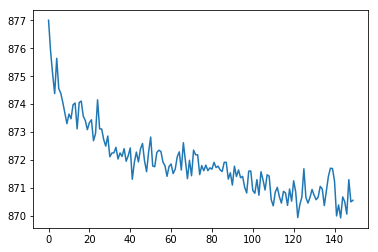

In [16]:
import matplotlib.pyplot as plt
plt.plot(perplexity_to_save)

Save perplexity to a csv file.

In [17]:
import numpy as np
np.savetxt("perplexity_train.csv", perplexity_to_save, delimiter =  ".", fmt='%10.5f')

We want to discard the first burn-in samples. `samples_keep` keeps the last n samples of the chain. We keep 80 samples where the chain has converged.

In [18]:
ldaobj.samples_keep(80)

Save the model to `finalized_model_train.sav` file to access it later.

In [19]:
from sklearn.externals import joblib
filename = os.getcwd() + '\\finalized_model_train.sav'
_ = joblib.dump(ldaobj, filename, compress=True) 

Here is how you can load the model.

In [20]:
from sklearn.externals import joblib
ldaobj = joblib.load('finalized_model_train.sav')

`topic_content(n)` method produces topic_description.csv file. The rows of this file contain the first `n` stems in each topic ranked according to their probability, using the final stored sample.

In [21]:
ldaobj.topic_content(100)

`dt_avg()` calculates an average of the matrices in `ldaobj.dt`. These are distributions of topics within each document. The result is saved in a dt.csv file.

In [22]:
dt = ldaobj.dt_avg()

`tt_avg()` calculates an average of the matrices in `ldaobj.tt`. These are average topics. The result is saved in a tt.csv file.

In [23]:
tt = ldaobj.tt_avg()
ldaobj.dict_print()

## Predicting topic distributions for articles in the test dataset

As the next step, we apply the previously estimated topic model to predict the topic distributions for articles in our test dataset.

In [24]:
startTime = datetime.now()

# Initialize a query object using the QueryGibbs method from the LDA module. 
queryobj = topicmodels.LDA.QueryGibbs(docsobj_test.stems,ldaobj.token_key,ldaobj.tt) 

# Perform the query operation with 20 iterations to infer the topic distributions for our test data.
queryobj.query(20)

Sample 0 queried
Sample 1 queried
Sample 2 queried
Sample 3 queried
Sample 4 queried
Sample 5 queried
Sample 6 queried
Sample 7 queried
Sample 8 queried
Sample 9 queried
Sample 10 queried
Sample 11 queried
Sample 12 queried
Sample 13 queried
Sample 14 queried
Sample 15 queried
Sample 16 queried
Sample 17 queried
Sample 18 queried
Sample 19 queried
Sample 20 queried
Sample 21 queried
Sample 22 queried
Sample 23 queried
Sample 24 queried
Sample 25 queried
Sample 26 queried
Sample 27 queried
Sample 28 queried
Sample 29 queried
Sample 30 queried
Sample 31 queried
Sample 32 queried
Sample 33 queried
Sample 34 queried
Sample 35 queried
Sample 36 queried
Sample 37 queried
Sample 38 queried
Sample 39 queried
Sample 40 queried
Sample 41 queried
Sample 42 queried
Sample 43 queried
Sample 44 queried
Sample 45 queried
Sample 46 queried
Sample 47 queried
Sample 48 queried
Sample 49 queried
Sample 50 queried
Sample 51 queried
Sample 52 queried
Sample 53 queried
Sample 54 queried
Sample 55 queried
Sa

In [25]:
# Calculate the perplexity for the test data.
perplexity_query_test = queryobj.perplexity()

# Print the perplexity for the test data.
print perplexity_query_test

# Save the calculated perplexity values into a CSV file.
np.savetxt("perplexity_query_test.csv", perplexity_query_test, delimiter =  ".", fmt='%10.5f')

[1124.88251144 1125.16224376 1124.51512868 1123.547523   1124.14363719
 1121.1707028  1119.42876776 1123.00271015 1122.07940376 1120.454484
 1121.94705083 1122.85530761 1122.83685242 1123.21851466 1124.32010066
 1120.88939846 1119.91977882 1124.24986607 1121.7957102  1120.46559705
 1121.37247164 1120.78633324 1120.18417244 1122.31517382 1119.73329105
 1120.03727479 1122.95400668 1121.71012837 1122.89428026 1124.30060838
 1122.21313246 1124.57189531 1122.04244546 1122.04236579 1121.02859495
 1120.57756174 1118.84937014 1119.90745985 1120.41604894 1122.01964626
 1121.12036887 1124.47378421 1118.63481093 1122.98608608 1119.25479769
 1121.28910814 1122.93410131 1120.21972396 1121.46186442 1120.70745504
 1122.05018375 1121.37011794 1120.64287002 1123.02427262 1121.17937368
 1121.23781016 1122.23538281 1118.68062544 1118.83036903 1117.17030683
 1121.2646882  1122.65336322 1117.34637909 1121.17744553 1121.49672307
 1117.55432307 1121.44563769 1120.18066126 1122.52249859 1121.16078904
 1120.08

Now let's save the estimated document-specific topic distributions to the file called `article_topic_forecasting.csv`.

In [26]:
import pandas as pd

# Compute the average document-topic distributions from the collected samples for the test data.
dt_query = queryobj.dt_avg()

# Concatenate the document-topic distributions of the training and test datasets into a single matrix.
dt_all_articles = np.concatenate((dt, dt_query), axis=0)

# Create a new DataFrame.
article_topic = pd.DataFrame()

# Fill the DataFrame with article-specific topic distributions.
for i in range(dt_all_articles.shape[1]):
    article_topic['T' + str(i)] = dt_all_articles[:,i]

# Save the DataFrame with article-specific topic distributions to a CSV file.
article_topic.to_csv('article_topic_forecasting.csv', encoding='utf-8')

print datetime.now() - startTime

0:02:29.379000


## Daily topics

In [27]:
startTime = datetime.now()
import nltk
from nltk.tokenize import wordpunct_tokenize

# Merge the tokenized stems from both the training and test datasets into a single array.
stems_all = np.concatenate((docsobj.stems, docsobj_test.stems), axis=0)

# Convert the array of tokenized stems into a single string per document and add it as a new column in the DataFrame.
data['stems'] = [' '.join(s) for s in stems_all] 

# Aggregate the stemmed strings up to the day level by concatenating all stems within each group of 'year','month', and 'day'.
aggtexts = data.groupby(['year', 'month', 'day'])['stems'].apply(lambda x: ' '.join(x)) 

# Tokenize each aggregated string in aggtexts.
aggtexts_tokens = map(wordpunct_tokenize, aggtexts)

# Initialize a query object with the tokenized stems from the aggregated texts.
queryobj = topicmodels.LDA.QueryGibbs(aggtexts_tokens,ldaobj.token_key,ldaobj.tt)

# Run the query on the aggregated texts.
queryobj.query(20)

Sample 0 queried
Sample 1 queried
Sample 2 queried
Sample 3 queried
Sample 4 queried
Sample 5 queried
Sample 6 queried
Sample 7 queried
Sample 8 queried
Sample 9 queried
Sample 10 queried
Sample 11 queried
Sample 12 queried
Sample 13 queried
Sample 14 queried
Sample 15 queried
Sample 16 queried
Sample 17 queried
Sample 18 queried
Sample 19 queried
Sample 20 queried
Sample 21 queried
Sample 22 queried
Sample 23 queried
Sample 24 queried
Sample 25 queried
Sample 26 queried
Sample 27 queried
Sample 28 queried
Sample 29 queried
Sample 30 queried
Sample 31 queried
Sample 32 queried
Sample 33 queried
Sample 34 queried
Sample 35 queried
Sample 36 queried
Sample 37 queried
Sample 38 queried
Sample 39 queried
Sample 40 queried
Sample 41 queried
Sample 42 queried
Sample 43 queried
Sample 44 queried
Sample 45 queried
Sample 46 queried
Sample 47 queried
Sample 48 queried
Sample 49 queried
Sample 50 queried
Sample 51 queried
Sample 52 queried
Sample 53 queried
Sample 54 queried
Sample 55 queried
Sa

In [28]:
# Calculate the perplexity for the aggregated texts.
perplexity_query_daily = queryobj.perplexity()

print perplexity_query_daily

# Save the perplexity of the aggregated texts to a CSV file.
np.savetxt("perplexity_query_daily.csv", perplexity_query_daily, delimiter =  ".", fmt='%10.5f')

[1469.2578686  1469.72948775 1468.8856532  1468.57110829 1468.76193783
 1468.50212748 1468.78817377 1468.71600452 1469.0797253  1468.7278375
 1468.4743339  1468.7766097  1468.50873042 1468.68160216 1468.7939763
 1467.73847529 1468.01856646 1469.10417268 1468.76079814 1468.89544924
 1468.49957978 1468.04454163 1468.62356775 1468.67863089 1468.94954162
 1468.11663417 1468.77050068 1468.07818631 1469.41635515 1469.00127297
 1467.3825193  1467.57848601 1467.9006324  1467.93709035 1467.90679904
 1467.9129981  1467.95880806 1467.71023941 1468.7077978  1467.16073499
 1466.35472519 1467.70147938 1466.48800651 1467.00373557 1466.36729391
 1466.35680266 1467.11339145 1466.20823519 1466.9607877  1467.09366721
 1467.25512636 1466.92350647 1466.21595691 1467.40408851 1467.14722108
 1467.37822392 1466.81578324 1466.46708166 1465.66471639 1467.21262155
 1467.11483172 1466.8337952  1466.46831069 1465.98063785 1466.49445435
 1467.02589251 1466.27122947 1466.47945859 1467.51021802 1468.01600172
 1467.62

In [29]:
# Compute the average document-topic distributions from the collected samples for the aggregated texts.
dt_query = queryobj.dt_avg()

# Create a DataFrame from the document-topic distributions, 
# using the day-level groups as the index and the topics as the column names.
aggtexts = pd.DataFrame(dt_query,index=aggtexts.index,columns=['T' + str(i) for i in xrange(queryobj.K)])

# Save the DataFrame with daily topic distributions to a CSV file.
aggtexts.to_csv("daily_topics_forecasting.csv")

print datetime.now() - startTime

0:20:37.653000
